## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
# Read CSV files, remove the unnamed column that is only another representation of CoinName
X_df = pd.read_csv(Path('Resources/crypto_data.csv'), index_col = 0)

In [3]:
X_df.shape

(1252, 6)

In [4]:
# Keep only currently trading cryptocurrencies / drop IsTrading column
only_trading = (X_df['IsTrading'] == True)
X_df = X_df.loc[only_trading].drop(columns=['IsTrading'])
X_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Drop rows that have any null value
X_df = X_df.dropna(axis=0, how='any')
X_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
# Keep only cryptocurrencies that have been mined
mined_crypto = (X_df['TotalCoinsMined'] > 0)
X_df = X_df.loc[mined_crypto]
X_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
# Drop the 'CoinName' column, it does not contribute to analysis
X_df = X_df.drop(columns=['CoinName'])
X_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [10]:
# Identify the data types of remaining columns
X_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [11]:
# Convert TotalCoinSupply to type float for the Machine Learning algorithms inputs
X_df['TotalCoinSupply'] = X_df['TotalCoinSupply'].astype(float)

In [12]:
# Check updated data types
X_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [13]:
# Identify the number of unique values in feature 'Algorithm' and 'ProofType'
print(X_df['Algorithm'].nunique(), X_df['ProofType'].nunique())

71 25


In [14]:
# Update features 'Algorithm' and 'ProofType' to numeric formats for the fitting.
# Expect (71 + 25 + (4 - 2)) = 98 features
X_train_df = pd.get_dummies(X_df)
print("X_train_df shape: ", X_train_df.shape)
X_train_df.columns

X_train_df shape:  (532, 98)


Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [15]:
# Standardize the dataset with StandardScaler() to reduce impact of features with large numbers
# Scaling the X data by using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_df)
X_scaled = scaler.transform(X_train_df)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction with PCA and t-SNE

In [16]:
# Use PCA to do initial dimensionality reduction with Explained Variance at 90%
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)
X_reduced

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.46532550e-15,  5.62343533e-15,  1.49507977e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.63645692e-15,  5.25359408e-15,  2.25718281e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.75066626e-14, -1.17632711e-13, -5.02829165e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         4.92696433e-14,  2.74532450e-14,  1.56967958e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.63533220e-15, -4.69781528e-16,  1.17522750e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.05646641e-15,  1.05006748e-15,  4.14908459e-15]])

In [17]:
X_reduced.shape

(532, 74)

In [31]:
# Use t-SNE to further reduce the number of dimensions and use a scatter plot to see identified clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(X_reduced)
tsne_features.shape

(532, 2)

In [32]:
# Prepare to plot the dataset

# The first column of transformed features
x_values = tsne_features[:,0]

# The second column of transformed features
y_values = tsne_features[:,1]

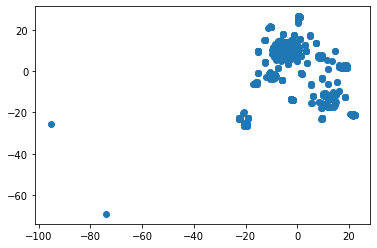

In [33]:
# Visualize the clusters
plt.scatter(x_values, y_values)
plt.show()

# Cluster Analysis with K-Means
K-Means is used to create an elbow plot to identify the best number of clusters by locating the best point of the elbow

In [35]:
from sklearn.cluster import KMeans

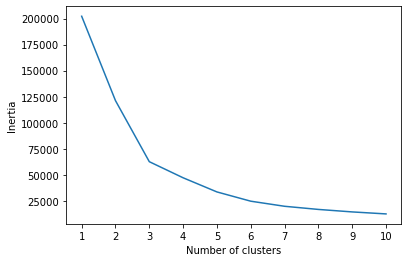

In [38]:
# Finding the best value for 'k' using the Elbow Curve
inertia = []
# k = [1,2,3,4,5,6,7,8,9,10]
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    # km.fit(X_reduced)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()